## Dominant Color Extraction Using Image Segmentation
- Extracts most dominant 'K' colors using K-Means
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

### Industrial Uses of Dominant color extraction
- Multi-color search is a typical part of color extraction technologies. 
    Through using it, you can conduct more complicated search of colors. This means you can identify       complex objects that contain more than one dominant color. 
    It also enables multi-color filtering of image search in databases and websites hosted in a color       palette functionality.  
- Identify the colors in the foreground and background of an image.
    In this way, you can remove the background if needed, or unnecessary elements from the foreground. 
    This allows for more flexibility, so you can focus only on the objects on the image, or on the         setting behind them.
- It can also be useful for e-commerce sites selling clothes for example, so when a person chooses a       product and the color filter we can show other similar products with similar colors

In [124]:
## Import all useful libraries
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [125]:
## Load Image 
im = cv2.imread('img.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
og_shape = im.shape
print(im.shape)

(1350, 1080, 3)


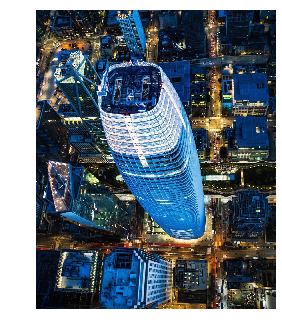

In [126]:
## Print smaple image
plt.style.use('seaborn')
plt.axis("off")
plt.imshow(im)
plt.show()

In [127]:
# Flatten each channel of the Image
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(1458000, 3)


In [128]:
from sklearn.cluster import KMeans

In [129]:
############# K-Means #######################
dominant_colors = 15

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [130]:
centers = km.cluster_centers_

In [131]:
# We will convert centers in float format into int
centers = np.array(centers,dtype='uint8')

In [132]:
# Center of each cluster
print(centers)

[[110  84  52]
 [107 168 213]
 [ 15  42  72]
 [171 196 219]
 [ 21  92 157]
 [ 13  25  40]
 [115 124 126]
 [ 63  75  83]
 [172 133  73]
 [233 236 232]
 [ 27 129 202]
 [201 184 142]
 [ 56  47  36]
 [ 12  58 111]
 [ 11  13  16]]


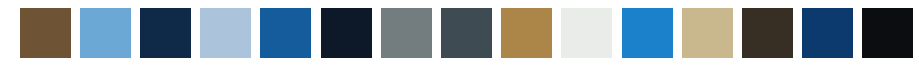

In [136]:
## Plotting the K-dominant colors
i = 1
plt.figure(0,figsize=(16,2))
colors = []
for each_col in centers:
    plt.subplot(1,15,i)
    i += 1
    colors.append(each_col)
    a = np.zeros((10,10,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.axis("off")
    plt.imshow(a)

plt.show()

In [137]:
## Segmenting our Original Image
new_img = np.zeros((1350*1080,3),dtype='uint8')
print(new_img.shape)

(1458000, 3)


In [138]:
## Color of each center in array form
colors

[array([110,  84,  52], dtype=uint8),
 array([107, 168, 213], dtype=uint8),
 array([15, 42, 72], dtype=uint8),
 array([171, 196, 219], dtype=uint8),
 array([ 21,  92, 157], dtype=uint8),
 array([13, 25, 40], dtype=uint8),
 array([115, 124, 126], dtype=uint8),
 array([63, 75, 83], dtype=uint8),
 array([172, 133,  73], dtype=uint8),
 array([233, 236, 232], dtype=uint8),
 array([ 27, 129, 202], dtype=uint8),
 array([201, 184, 142], dtype=uint8),
 array([56, 47, 36], dtype=uint8),
 array([ 12,  58, 111], dtype=uint8),
 array([11, 13, 16], dtype=uint8)]

In [139]:
## Assigns label to each color
km.labels_

array([14, 14, 14, ...,  7, 12, 12])

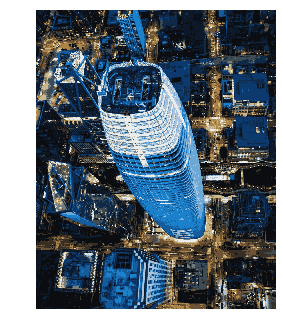

In [140]:
## Final Image predicted using K-Means algorithm
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape((og_shape))
plt.axis("off")
plt.imshow(new_img)
plt.show()